In [40]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [41]:
df = sns.load_dataset('titanic')[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'survived']]

### Exploratory Data Analysis (EDA)

In [42]:
df.head()

,pclass,sex,age,sibsp,parch,fare,embarked,survived
0,3,male,22.0,1,0,7.2500,S,0
1,1,female,38.0,1,0,71.2833,C,1
2,3,female,26.0,0,0,7.9250,S,1
3,1,female,35.0,1,0,53.1000,S,1
4,3,male,35.0,0,0,8.0500,S,0


In [43]:
df.shape

(891, 8)

In [44]:
df.dtypes

,0
pclass,int64
sex,object
age,float64
sibsp,int64
parch,int64
fare,float64
embarked,object
survived,int64


In [45]:
df.describe(include="all")

,pclass,sex,age,sibsp,parch,fare,embarked,survived
count,891.000000,891,714.000000,891.000000,891.000000,891.000000,889,891.000000
unique,NaN,2,NaN,NaN,NaN,NaN,3,NaN
top,NaN,male,NaN,NaN,NaN,NaN,S,NaN
freq,NaN,577,NaN,NaN,NaN,NaN,644,NaN
mean,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN,0.383838
std,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN,0.486592
min,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,0.000000
25%,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN,0.000000
50%,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN,0.000000
75%,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN,1.000000


In [46]:
numerical_features = df.select_dtypes(include=["int64", "float64"]).columns.tolist()

In [47]:
numerical_features

['pclass', 'age', 'sibsp', 'parch', 'fare', 'survived']

In [48]:
categorical_features = df.select_dtypes(include=["object"]).columns.tolist()

In [49]:
categorical_features

['sex', 'embarked']

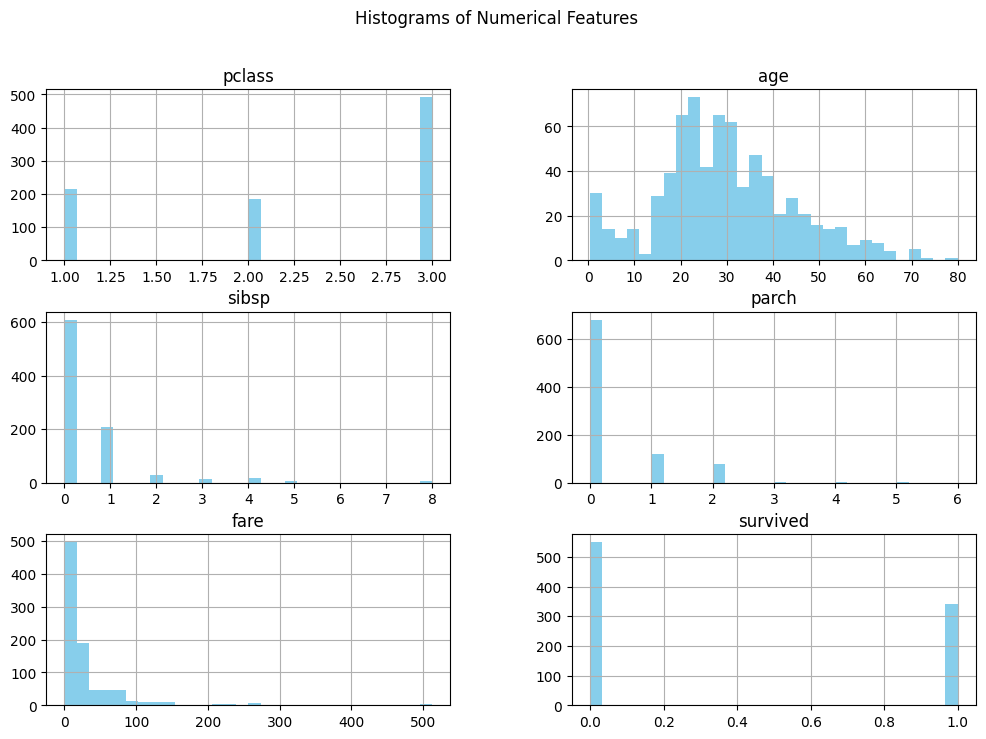

In [50]:
df[numerical_features].hist(bins=30, figsize=(12, 8), color='skyblue')
plt.suptitle("Histograms of Numerical Features")
plt.show()

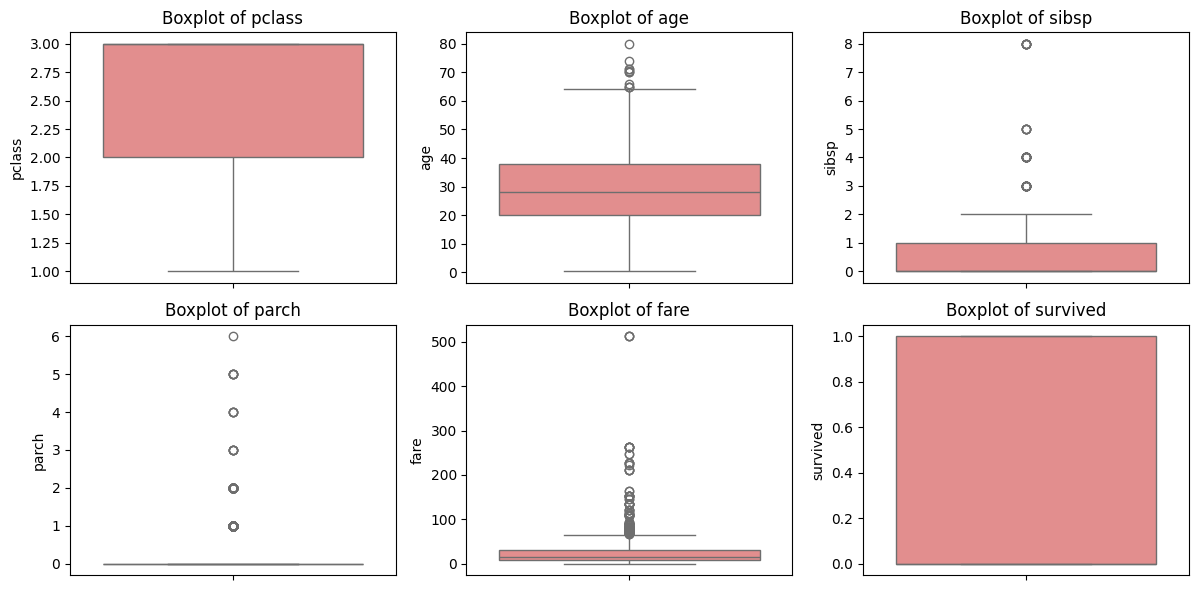

In [51]:
plt.figure(figsize=(12, 6))
for i, col in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col], color="lightcoral")
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

/tmp/ipython-input-2187730698.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette="Set2")
/tmp/ipython-input-2187730698.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette="Set2")


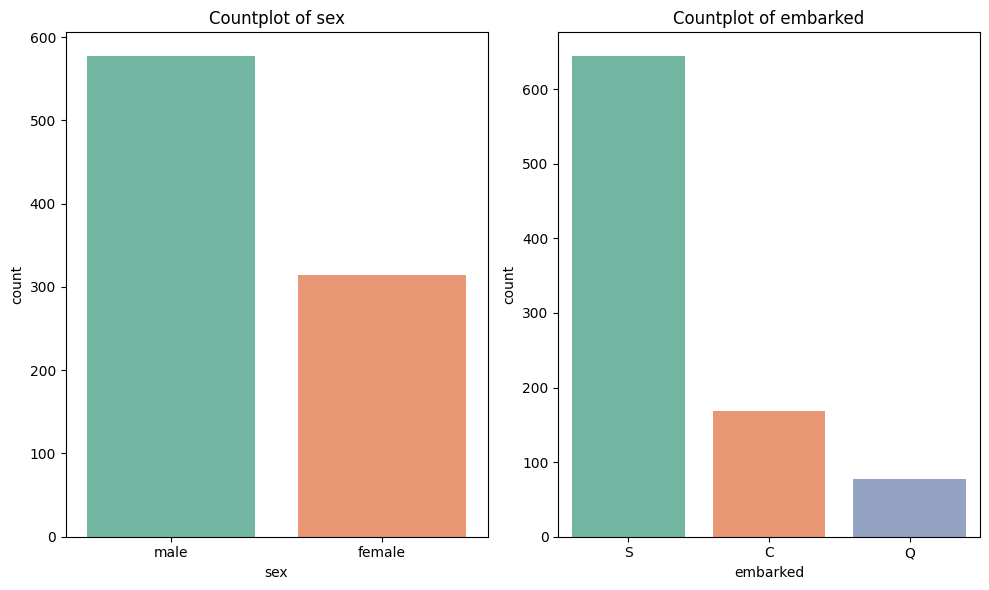

In [52]:
plt.figure(figsize=(10, 6))
for i, col in enumerate(categorical_features, 1):
    plt.subplot(1, len(categorical_features), i)
    sns.countplot(x=df[col], palette="Set2")
    plt.title(f"Countplot of {col}")
plt.tight_layout()
plt.show()

### Handle Missing Values (if any)

In [53]:
df.isnull().sum()

,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
survived,0


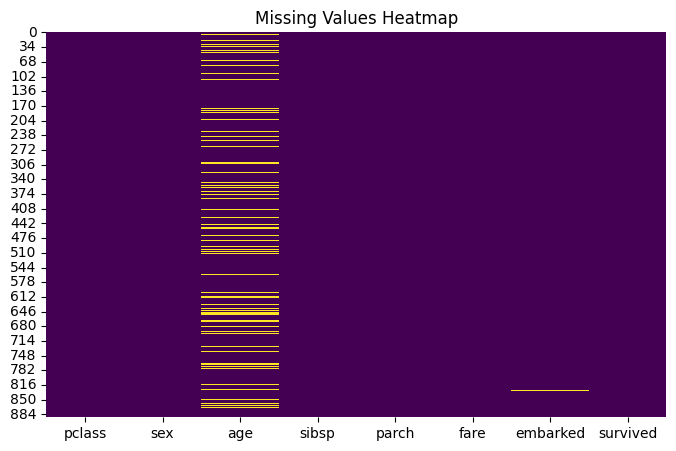

In [54]:
plt.figure(figsize=(8,5))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

In [55]:
df['age'].fillna(df['age'].median(), inplace=True)

/tmp/ipython-input-1654433547.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)


In [56]:
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)

/tmp/ipython-input-1964997694.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)


In [57]:
df.isnull().sum()

,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,0
survived,0


### Label Encode Categorical Columns

In [58]:
le = LabelEncoder()

In [59]:
df['sex'] = le.fit_transform(df['sex'])
df['embarked'] = le.fit_transform(df['embarked'])

In [60]:
df.head()

,pclass,sex,age,sibsp,parch,fare,embarked,survived
0,3,1,22.0,1,0,7.2500,2,0
1,1,0,38.0,1,0,71.2833,0,1
2,3,0,26.0,0,0,7.9250,2,1
3,1,0,35.0,1,0,53.1000,2,1
4,3,1,35.0,0,0,8.0500,2,0


In [61]:
df.dtypes

,0
pclass,int64
sex,int64
age,float64
sibsp,int64
parch,int64
fare,float64
embarked,int64
survived,int64


### Split Data

In [62]:
X = df.drop("survived", axis=1)
y = df["survived"]

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [64]:
X_train.shape

(623, 7)

In [65]:
y_train.shape

(623,)

In [66]:
X_test.shape

(268, 7)

In [67]:
y_test.shape

(268,)

### Train Two or More Decision Trees

In [68]:
models = {
    "DT_depth3": DecisionTreeClassifier(max_depth=3, random_state=42),
    "DT_depth5": DecisionTreeClassifier(max_depth=5, random_state=42),
    "DT_depth7": DecisionTreeClassifier(max_depth=7, random_state=42),
    "DT_no_limit": DecisionTreeClassifier(random_state=42)
}

In [69]:
results = {}

In [70]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")

DT_depth3 Accuracy: 0.7948
DT_depth5 Accuracy: 0.7910
DT_depth7 Accuracy: 0.7910
DT_no_limit Accuracy: 0.7612


In [71]:
subset_features = ["pclass", "sex", "age"]

In [72]:
X_train_sub = X_train[subset_features]
X_test_sub = X_test[subset_features]

In [73]:
dt_subset = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_subset.fit(X_train_sub, y_train)
y_pred_sub = dt_subset.predict(X_test_sub)
print(f"DT_depth5_subset Accuracy: {accuracy_score(y_test, y_pred_sub):.4f}")

DT_depth5_subset Accuracy: 0.7836


### Evaluation & Comparison


DT_depth3
Accuracy: 0.7948
Confusion Matrix:
 [[157   8]
 [ 47  56]]


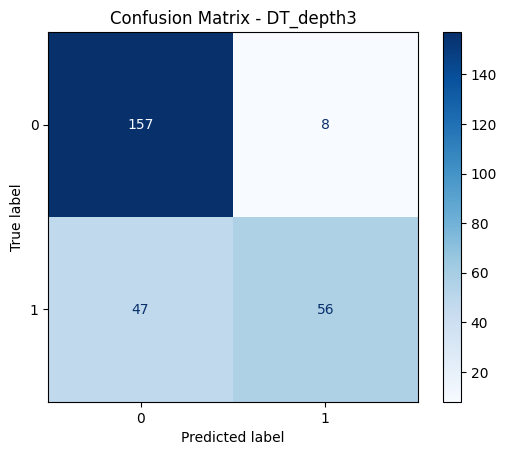


DT_depth5
Accuracy: 0.7910
Confusion Matrix:
 [[150  15]
 [ 41  62]]


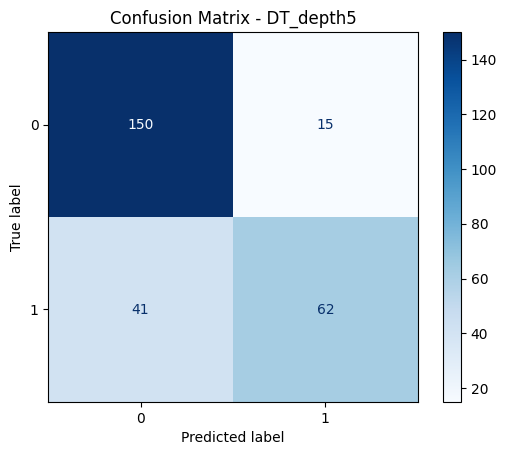


DT_depth7
Accuracy: 0.7910
Confusion Matrix:
 [[149  16]
 [ 40  63]]


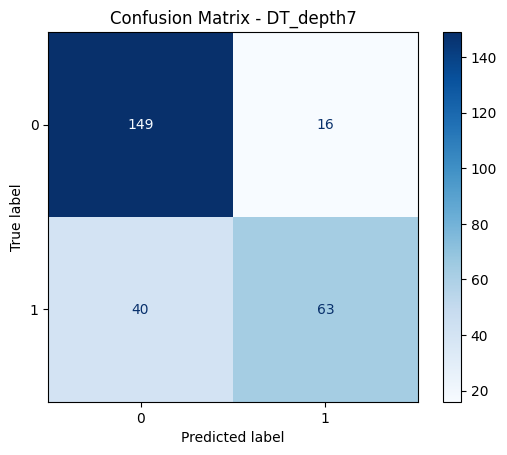


DT_no_limit
Accuracy: 0.7612
Confusion Matrix:
 [[138  27]
 [ 37  66]]


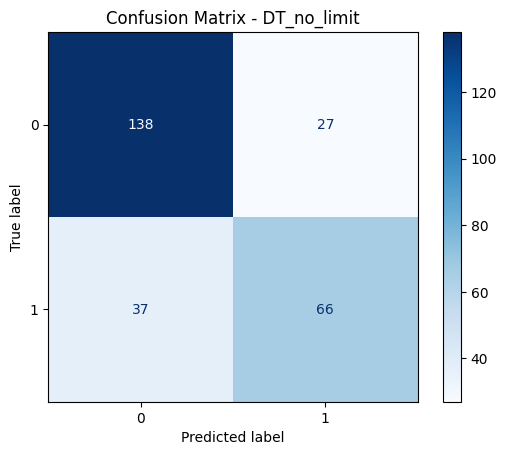

In [74]:
for name, model in models.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    print(f"\n{name}")
    print(f"Accuracy: {acc:.4f}")
    print("Confusion Matrix:\n", cm)

    # Plot confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap="Blues")
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

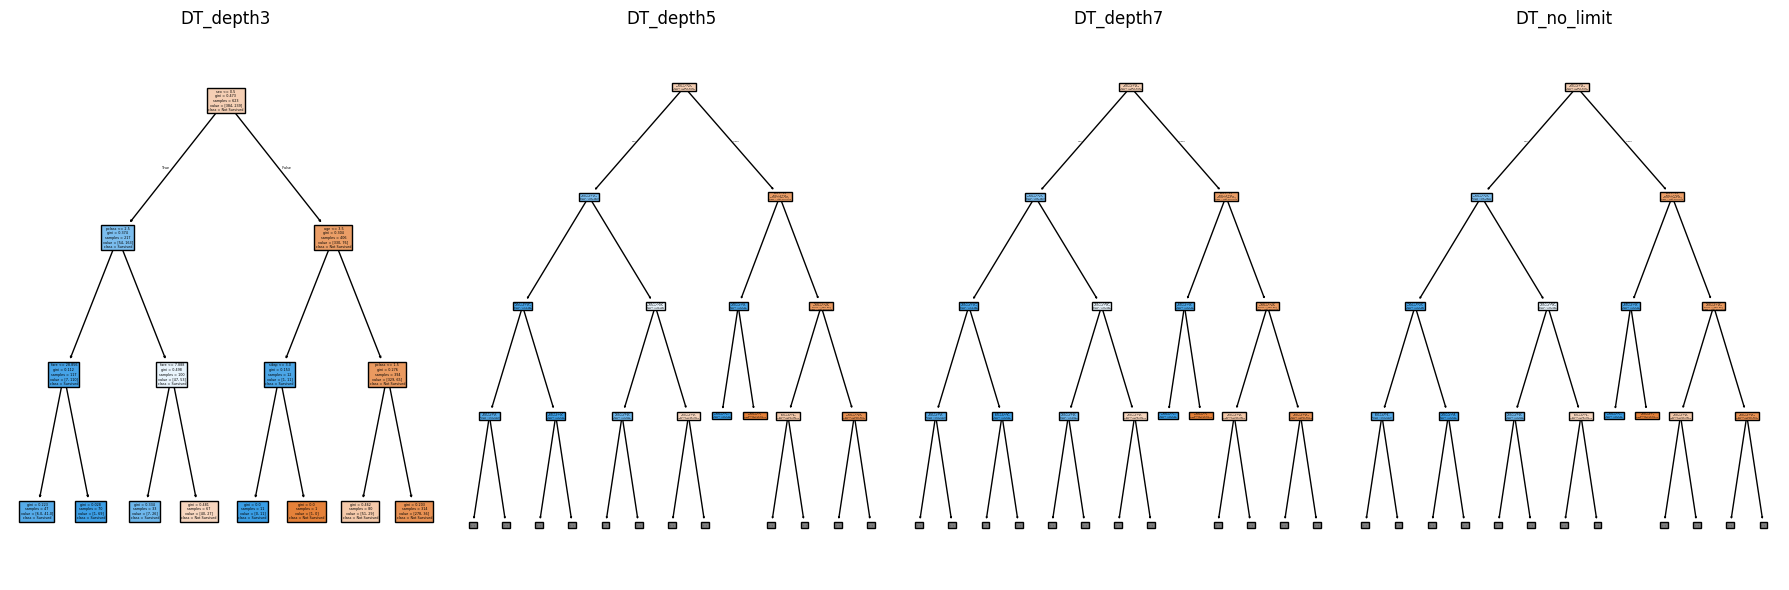

In [75]:
plt.figure(figsize=(18, 6))
for i, (name, model) in enumerate(models.items(), 1):
    plt.subplot(1, len(models), i)
    plot_tree(model, filled=True, feature_names=X.columns, class_names=["Not Survived", "Survived"], max_depth=3)
    plt.title(name)
plt.tight_layout()
plt.show()